[16. 16.] [0.    0.025 0.05  0.075 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7
 0.8   0.9   0.95  1.   ] [0.      0.00781 0.01161 0.01462 0.01733 0.02164 0.02496 0.02999 0.03292
 0.03385 0.03298 0.02941 0.02314 0.01387 0.00808 0.     ] [0.    0.025 0.05  0.075 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7
 0.8   0.9   0.95  1.   ] [ 0.      -0.00349 -0.00389 -0.00418 -0.00427 -0.00456 -0.00444 -0.00401
 -0.00358 -0.00315 -0.00272 -0.00229 -0.00186 -0.00143 -0.00122  0.     ]


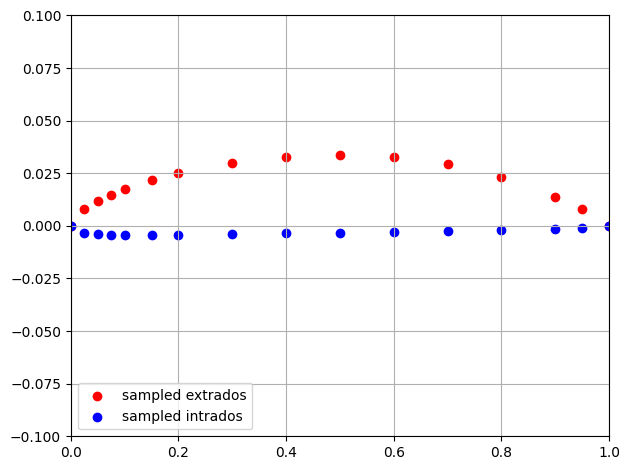

In [86]:
from load_foil import load_foil
import matplotlib.pyplot as plt

dim, ex, ey, ix, iy = load_foil("../datasets/goe05k.dat")
print(dim, ex, ey, ix, iy)

plt.figure(figsize=(6.4, 4.8))

plt.scatter(ex, ey, c='r', marker='o', label="sampled extrados")
plt.scatter(ix, iy, c='b', marker='o', label="sampled intrados")

plt.xlim(0.0, 1.0)
plt.ylim(-0.1, 0.1)

plt.legend(loc='lower left')
plt.grid()
plt.tight_layout()
plt.savefig("goe05k_sampled.png")
plt.show()

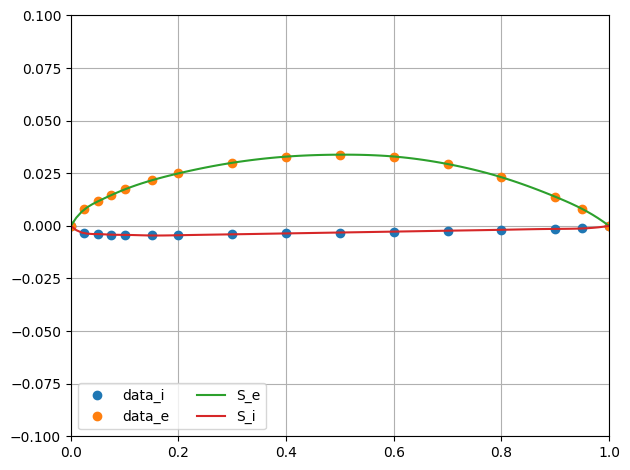

In [87]:
import scipy.interpolate as i
import numpy as np

xs = np.linspace(0, 1, 100)
_, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(ix, iy, 'o', label='data_i')
ax.plot(ex, ey, 'o', label='data_e')

cs = i.CubicSpline(ex, ey, axis=0, bc_type='not-a-knot')
ax.plot(xs, cs(xs), label="S_e")

cs = i.CubicSpline(ix, iy, axis=0, bc_type='not-a-knot')
ax.plot(xs, cs(xs), label="S_i")

plt.xlim(0.0, 1.0)
plt.ylim(-0.1, 0.1)
ax.legend(loc='lower left', ncol=2)

plt.grid()
plt.tight_layout()
plt.show()

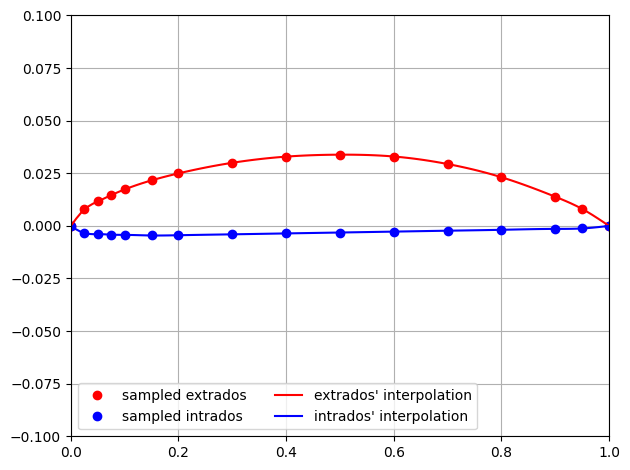

In [88]:
from part1 import create_cubic_interpolation_function


xs = np.linspace(0,1,100)
_, ax = plt.subplots(figsize=(6.4, 4.8))
ax.plot(ex, ey, 'o', c='r', label='sampled extrados')
ax.plot(ix, iy, 'o', c='b', label='sampled intrados')

cs = create_cubic_interpolation_function(ex, ey)
ax.plot(xs, list(map(cs, xs)), c='r', label="extrados' interpolation")

cs = create_cubic_interpolation_function(ix, iy)
ax.plot(xs, list(map(cs, xs)), c='b', label="intrados' interpolation")

plt.xlim(0.0, 1.0)
plt.ylim(-0.1, 0.1)
ax.legend(loc='lower left', ncol=2)

plt.grid()
plt.tight_layout()
plt.savefig("goe05k_interpolated.png")
plt.show()

